# Statistics.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats

In [2]:
import os
os.chdir(r'D:\Sagun Shakya\Python\Data Sets\article-resources-master\From Good to Great Data Science, Part 1 Correlations and Confidence')

In [3]:
hospital = pd.read_csv('hospital_ratings.csv', index_col = 'Unnamed: 0')
hospital.head(2)

# Each row represents a hospital.

,mortality_rate,quality_rating
0,average,1
1,below_average,4


In [4]:
hospital.isnull().sum()

mortality_rate    0
quality_rating    0
dtype: int64

In [5]:
hospital['mortality_rate'].value_counts()

average          57
below_average    35
above_average     8
Name: mortality_rate, dtype: int64

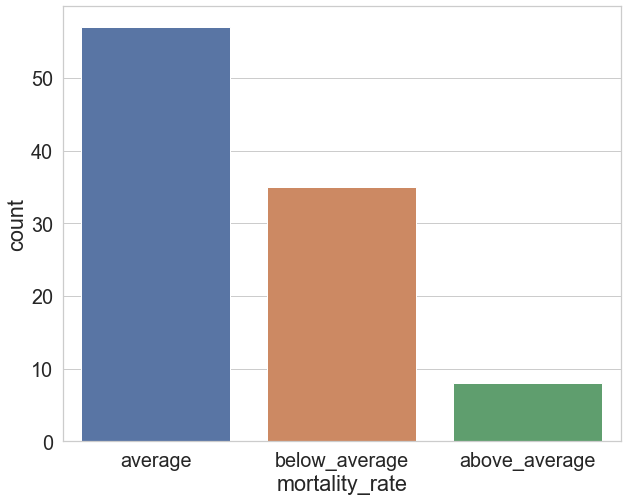

In [17]:
plt.figure( figsize = (10,8) )
sns.set(style = 'whitegrid',  font_scale = 1.8)

sns.countplot(hospital['mortality_rate'])
plt.show()

### Encoding the ordinal data called 'mortality_rate' as follows:
- below_average: +1
- average: 0
- above_average: -1

In [7]:
mortality_map = dict()
mortality_map['below_average'] = 1
mortality_map['average']=0
mortality_map['above_average'] = -1

In [8]:
hospital['mortality_rate_coded'] = hospital['mortality_rate'].map(mortality_map)

In [9]:
hospital['mortality_rate_coded'].value_counts()

 0    57
 1    35
-1     8
Name: mortality_rate_coded, dtype: int64

In [10]:
hospital.head()

,mortality_rate,quality_rating,mortality_rate_coded
0,average,1,0
1,below_average,4,1
2,above_average,1,-1
3,average,4,0
4,average,4,0


### Pearson's correlation coefficient.

In [33]:
from scipy.stats import pearsonr

x = pearsonr(hospital['quality_rating'], hospital['mortality_rate_coded'])
x

(0.47371205555642815, 6.426261109600425e-07)

In [34]:
Pearson,_ = pearsonr(hospital['quality_rating'], hospital['mortality_rate_coded'])

Pearson

0.47371205555642815

In [31]:
hospital.corr(method = 'pearson')

,quality_rating,mortality_rate_coded
quality_rating,1.000000,0.473712
mortality_rate_coded,0.473712,1.000000


#### However, this is not applicable for ordinal data. We need to use non-parametric measure like Spearman's Correlation coefficient.

 ### Spearman's Correlation:
 - The calculation of Spearman’s correlation coefficient and subsequent significance testing of it requires the following data assumptions to hold:
       -interval or ratio level or ordinal;
       -monotonically related.
- Note: unlike Pearson’s correlation, there is no requirement of normality and hence it is a nonparametric statistic.
- Pearson's Correlation is sensitive to outliers as well as skewness.


In [18]:
hospital.corr(method = 'spearman')

In [27]:
from scipy.stats import spearmanr
a= spearmanr(hospital['quality_rating'], hospital['mortality_rate_coded'])

In [28]:
a

SpearmanrResult(correlation=0.37909763025792015, pvalue=0.00010043425124583103)

In [30]:
Spearman,_ = spearmanr(hospital['quality_rating'], hospital['mortality_rate_coded'])

Spearman

0.37909763025792015

In [38]:
PercentDiff = ((np.abs(Pearson - Spearman))/ Pearson) * 100
PercentDiff

19.972982361061657

#### Had you reported this correlation using pearson as opposed to spearman, you might have seriously mislead a customer or coworker.

# Opiod Prescription Problem.

### Problem Description:
- prescriber_id: A random code that identifies pharmacists.
- num_opioid_prescriptions: The number of opioid prescriptions prescribed on a given day.
- num_prescriptions: The number of total prescriptions prescribed on a given day.

In [42]:
prescribe = pd.read_csv(r'prescriptions.csv', index_col = 'Unnamed: 0')
prescribe.head()

,prescriber_id,num_opioid_prescriptions,num_prescriptions
0,BDRSDDB2&RA,4,7
1,3$N3WG4&BBO,25,28
2,S2NGGOGBRB4,1,1
3,S2NGGOGBRB4,18,22
4,NBORABOESOI,1,1


In [44]:
prescribe.shape

(150, 3)

In [46]:
prescribe.dropna().head(2)

,prescriber_id,num_opioid_prescriptions,num_prescriptions
0,BDRSDDB2&RA,4,7
1,3$N3WG4&BBO,25,28


#### Inspecting the number of people who are over prescribing opioids.

In [51]:
prescribe['opioid_fraction'] = (prescribe['num_opioid_prescriptions'] / prescribe['num_prescriptions'])*100

In [52]:
prescribe.head(15)

,prescriber_id,num_opioid_prescriptions,num_prescriptions,opioid_fraction
0,BDRSDDB2&RA,4,7,57.142857
1,3$N3WG4&BBO,25,28,89.285714
2,S2NGGOGBRB4,1,1,100.000000
3,S2NGGOGBRB4,18,22,81.818182
4,NBORABOESOI,1,1,100.000000
5,4O4EAGWROGB,20,30,66.666667
6,WPOARS4GW9I,11,12,91.666667
7,PDS$GG9GOGA,29,37,78.378378
8,BBP34DOGADB,1,1,100.000000
9,S$BO&OGO99O,16,19,84.210526


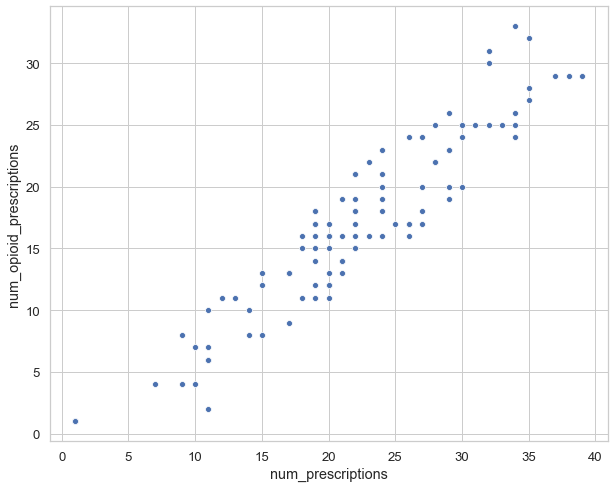

In [54]:
plt.figure( figsize = (10,8) )
sns.set(style = 'whitegrid',  font_scale = 1.2)

sns.scatterplot(x = prescribe['num_prescriptions'], y = prescribe['num_opioid_prescriptions'] )
plt.show()

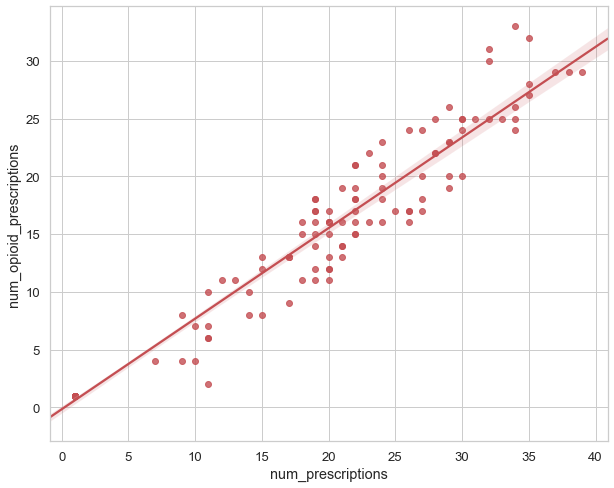

In [57]:
plt.figure( figsize = (10,8) )
sns.set(style = 'whitegrid',  font_scale = 1.2)

p = sns.regplot(x = prescribe['num_prescriptions'], y = prescribe['num_opioid_prescriptions'],
                color = 'r' )
plt.show()

In [59]:
x_val = p.get_lines()[0].get_xdata()    #Returns a numpy array of x_values.
y_val = p.get_lines()[0].get_ydata()    #Returns a numpy array of y_values.

In [65]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, stdErr = linregress(x_val, y_val)

In [66]:
slope

0.7843199719658177

In [67]:
intercept

-0.17133823400578585

In [69]:
R_squared = r_value ** 2
R_squared

1.0

### Inspecting using opioid fraction.

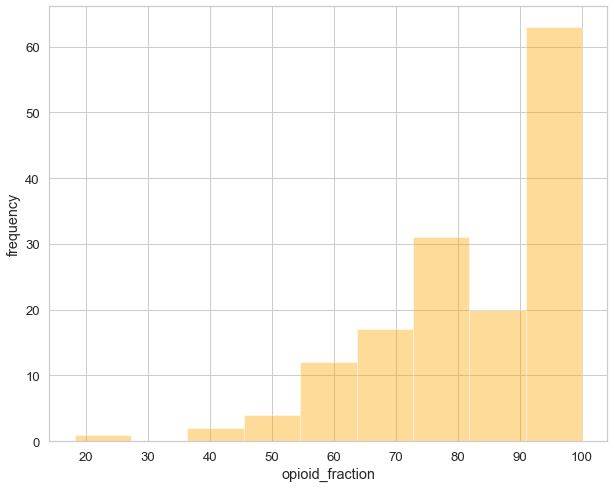

In [78]:
plt.figure( figsize = (10,8) )
sns.set(style = 'whitegrid',  font_scale = 1.2)
sns.distplot(prescribe['opioid_fraction'], kde= 0, color = 'orange')
plt.ylabel('frequency')
plt.show()

#### Many doctors prescribe opioids.

### Grouping by ID's.

In [79]:
prescribers = prescribe.groupby('prescriber_id').agg('sum')

In [81]:
prescribers.head()

,num_opioid_prescriptions,num_prescriptions,opioid_fraction
prescriber_id,,,
$39AGIIOGO2,15,22,68.181818
$DG2GOGDD9D,14,18,176.470588
$OBDNSADD96,37,57,280.384615
&$4OO2EW$OB,16,20,80.000000
&64O2OASRNA,22,23,195.454545


In [82]:
del prescribers['opioid_fraction']

In [83]:
prescribers['percentage'] = (prescribers['num_opioid_prescriptions'] / prescribers['num_prescriptions']) * 100 

In [84]:
prescribers.head()

,num_opioid_prescriptions,num_prescriptions,percentage
prescriber_id,,,
$39AGIIOGO2,15,22,68.181818
$DG2GOGDD9D,14,18,77.777778
$OBDNSADD96,37,57,64.912281
&$4OO2EW$OB,16,20,80.000000
&64O2OASRNA,22,23,95.652174


In [85]:
prescribers.percentage.max()

100.0

In [90]:
prescribers.reset_index()

,prescriber_id,num_opioid_prescriptions,num_prescriptions,percentage
0,$39AGIIOGO2,15,22,68.181818
1,$DG2GOGDD9D,14,18,77.777778
2,$OBDNSADD96,37,57,64.912281
3,&$4OO2EW$OB,16,20,80.000000
4,&64O2OASRNA,22,23,95.652174
5,&AGO$DEOPRR,47,58,81.034483
6,&OS2DN4DADO,1,1,100.000000
7,&SOEB4RODOG,39,51,76.470588
8,2BDPWROOBOR,13,17,76.470588
9,3$N3WG4&BBO,32,39,82.051282


In [96]:
prescribers = prescribers.sort_values('percentage', ascending = 0)

In [97]:
prescribers.head(20)

,num_opioid_prescriptions,num_prescriptions,percentage
prescriber_id,,,
DE$W$6WBN9W,1,1,100.000000
3NG4ONN46GO,2,2,100.000000
6W349S&GD&N,1,1,100.000000
4WA6NBOO&DB,1,1,100.000000
NBORABOESOI,1,1,100.000000
4R9RDN2G6D9,1,1,100.000000
OAIGB9OGSE$,1,1,100.000000
PGWSD49S6OW,1,1,100.000000
BO&2BGDNGO&,1,1,100.000000


# The End.